In [1]:
import jax.numpy as jnp
import jax
import numpy as np

import src.models
import orbax.checkpoint
from src.training import train_utils

Setup to load in checkpoint

In [8]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

T = 1.0
N = 100
y=(1.0,)

def get_score(checkpoint_path):
    restored = orbax_checkpointer.restore(checkpoint_path)
    model = src.models.score_mlp.ScoreMLP(**restored["network"])
    params = restored["params"]
    trained_score = train_utils.trained_score(model, params)
    sde = restored["sde"]
    return trained_score, sde


In [3]:
def error(ts, true_score, trained_score, sde, x0):
    """mean squared error between true and trained score"""
    true = jax.vmap(true_score, in_axes=(0, None, None, None))(ts, x0, sde["T"], sde["y"])
    trained = jax.vmap(trained_score, in_axes=(0, None))(ts, x0)
    return jnp.mean((true - trained) ** 2)

def error_forward(ts, true_score, trained_score, sde, y):
    """mean squared error between true and trained score"""
    true = jax.vmap(true_score, in_axes=(None, None, 0, None))(0, sde["x0"], ts, y)
    trained = jax.vmap(trained_score, in_axes=(0, None))(ts, y)
    return jnp.mean((true - trained) ** 2)

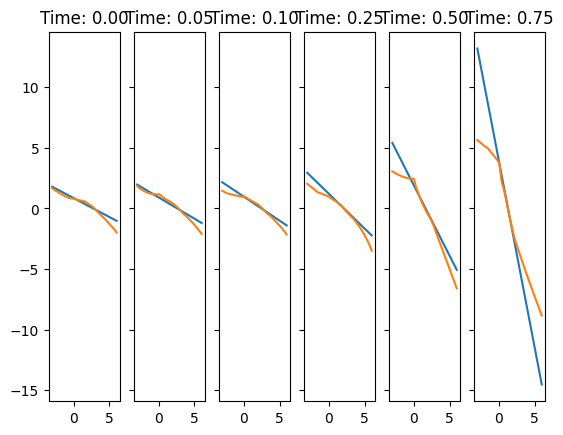

In [11]:
from src.plotting import plot_score
from src.data_generate_sde import sde_ornstein_uhlenbeck as ou
import matplotlib.pyplot as plt

checkpoint_path = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/fixed_y{y}_10_reloads"
trained_score, sde = get_score(checkpoint_path)
true_score = ou.score
fig, axs = plot_score(true_score, trained_score, T, y, x=jnp.linspace(-3, 6, 1000)[..., None],
                      t=jnp.asarray([0.0, 0.05, 0.1, 0.25, 0.5, 0.75]),)
plt.show()

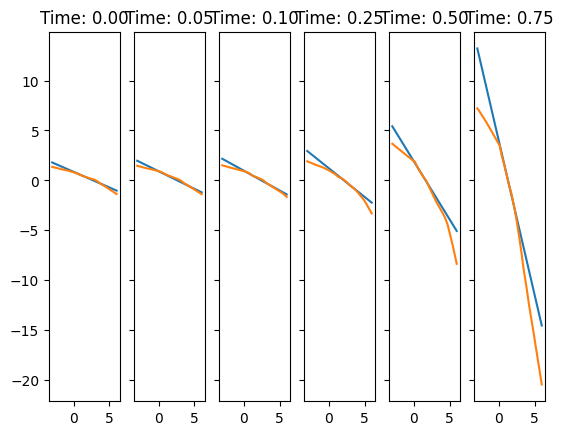

In [10]:
from src.plotting import plot_score
from src.data_generate_sde import sde_ornstein_uhlenbeck as ou
import matplotlib.pyplot as plt

checkpoint_path = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/dims/fixed_y_1_d_1"
trained_score, sde = get_score(checkpoint_path)
true_score = ou.score
fig, axs = plot_score(true_score, trained_score, T, y, x=jnp.linspace(-3, 6, 1000)[..., None],
                      t=jnp.asarray([0.0, 0.05, 0.1, 0.25, 0.5, 0.75]),)
plt.show()